## Introduction

There are a lot of libraries about colors in python and there are several ways to apply color to our plots: RGB, tuples and we can even color by names (matplotlib) but I like the xcolor a LaTeX package. By this package we can apply color using expressions like `green!40!yellow`. What means this? the final color is a mixture between green and yellow with a 40% of green and 60% of yellow. Expressions like `blue!70!red!20` is also allowed and means that the final color is a mixture between blue and red  with a 70% of blue and 30% of red and also the value 20 at the end of the expression means that we will give the color 20% transparency.

In addition, it allows to calculate the complementary color following the equations:

Let r, g, and b be RGB components of the original colora and let rc, gc, and bc be RGB components of the complementary color.

Then:

rc = max(r,g,b) + min(r,g,b) - r   
gc = max(r,g,b) + min(r,g,b) - g  
bc = max(r,g,b) + min(r,g,b) - b

This is great for me and it is a very nice way to create new colors.

For this reason I have created the `namecolor_to_rgb` function, to translate this expressions to a list and this list can be applied as color in Python.

Only is mandatory load the `to_rgb` function from matplotlib.colors. This is necessary to translate the color names to rgb. You also need the `np.max` and `np.min` functions from the numpy package.

The list of color names in matplotlib is the following.

![](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png)

From `matplotlib.colors` can be loaded the dictionary `mcolors.CSS4_COLORS`. This is a dictionary with pairs color name and definition.

## Definition

In [56]:
import matplotlib.pyplot as plt
import numpy as np

The function is very simple and translate from string to list of four numbers (from 0 to 1) that matplotlib understands as a color.

### namecolor_to_rgb

In [81]:
from matplotlib.colors import to_rgb

def namecolor_to_rgb(s, complementary = False):
    
    colors_ = s.split('!')
    
    color1_ = to_rgb(colors_[0])
    color2_ = to_rgb(colors_[2])
    proportion = int(colors_[1])

    final_color = [0.0, 0.0, 0.0, 1.0]

    for i_ in range(3):
        final_color[i_] = color1_[i_] * proportion/100 + color2_[i_] * (100 - proportion)/100

    if len(colors_) == 4:
        final_color[3] = int(colors_[3])/100
        
        
    if complementary:
        rc = np.max(final_color[:3]) + np.min(final_color[:3]) - final_color[0]
        gc = np.max(final_color[:3]) + np.min(final_color[:3]) - final_color[1]
        bc = np.max(final_color[:3]) + np.min(final_color[:3]) - final_color[2]
        
        final_color[0] = rc
        final_color[1] = gc
        final_color[2] = bc
            
    return final_color    

### Function output

If with calling the function with three arguments, this is, without alpha argument.

In [58]:
namecolor_to_rgb('yellow!80!white')

[1.0, 1.0, 0.2, 1.0]

If we calling the function with alpha argument, this is, the alpha argument.

In [59]:
namecolor_to_rgb('yellow!80!white!50')

[1.0, 1.0, 0.2, 0.5]

## Examples applied

### Selecting one color

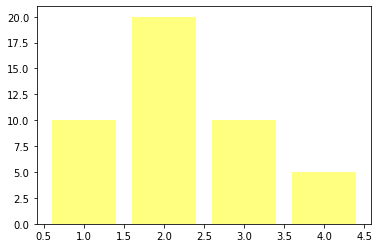

In [79]:
data_ = [10, 20, 10, 5]
plt.bar(x = [1,2,3,4], 
        height = data_, 
        color = namecolor_to_rgb('yellow!50!white'))
plt.show()        

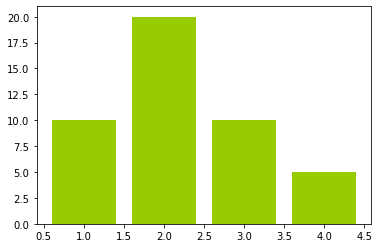

In [61]:
data_ = [10, 20, 10, 5]
plt.bar(x = [1,2,3,4], 
        height = data_, 
        color = namecolor_to_rgb('yellow!60!green'))
plt.show()        

### Complementary color

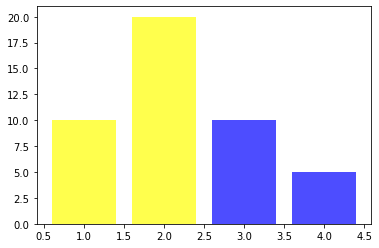

In [86]:
data_ = [10, 20, 10, 5]
plt.bar(x = [1,2,3,4], 
        height = data_, 
        color = [namecolor_to_rgb('yellow!70!white'),
                 namecolor_to_rgb('yellow!70!white'),
                 namecolor_to_rgb('yellow!70!white', complementary = True),
                 namecolor_to_rgb('yellow!70!white', complementary = True),])
plt.show()        

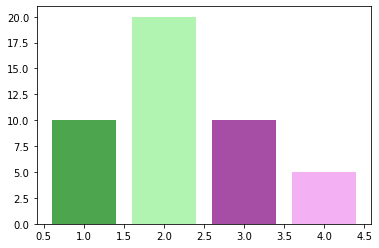

In [89]:
data_ = [10, 20, 10, 5]
plt.bar(x = [1,2,3,4], 
        height = data_, 
        color = [namecolor_to_rgb('green!70!white'),
                 namecolor_to_rgb('lightgreen!70!white'),
                 namecolor_to_rgb('green!70!white', complementary = True),
                 namecolor_to_rgb('lightgreen!70!white', complementary = True),])
plt.show()        

### Color gradient

From light to color.

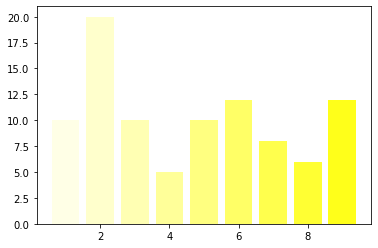

In [62]:
data_ = [10, 20, 10, 5, 10, 12, 8, 6, 12]
plt.bar(x = [1,2,3,4,5,6,7,8,9], 
        height = data_, 
        color = [namecolor_to_rgb('yellow!10!white'),
                 namecolor_to_rgb('yellow!20!white'),
                 namecolor_to_rgb('yellow!30!white'),
                 namecolor_to_rgb('yellow!40!white'),
                 namecolor_to_rgb('yellow!50!white'),
                 namecolor_to_rgb('yellow!60!white'),
                 namecolor_to_rgb('yellow!70!white'),
                 namecolor_to_rgb('yellow!80!white'),
                 namecolor_to_rgb('yellow!90!white'),])
plt.show()                 

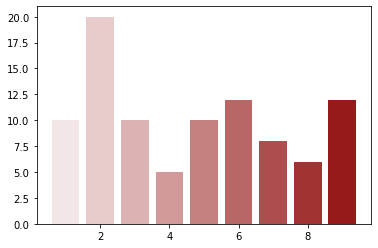

In [64]:
data_ = [10, 20, 10, 5, 10, 12, 8, 6, 12]
plt.bar(x = [1,2,3,4,5,6,7,8,9], 
        height = data_, 
        color = [namecolor_to_rgb('darkred!10!white'),
                 namecolor_to_rgb('darkred!20!white'),
                 namecolor_to_rgb('darkred!30!white'),
                 namecolor_to_rgb('darkred!40!white'),
                 namecolor_to_rgb('darkred!50!white'),
                 namecolor_to_rgb('darkred!60!white'),
                 namecolor_to_rgb('darkred!70!white'),
                 namecolor_to_rgb('darkred!80!white'),
                 namecolor_to_rgb('darkred!90!white'),])
plt.show()                 

From black to color.

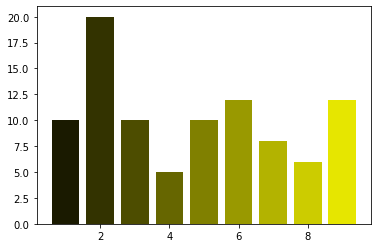

In [63]:
data_ = [10, 20, 10, 5, 10, 12, 8, 6, 12]
plt.bar(x = [1,2,3,4,5,6,7,8,9], 
        height = data_, 
        color = [namecolor_to_rgb('yellow!10!black'),
                 namecolor_to_rgb('yellow!20!black'),
                 namecolor_to_rgb('yellow!30!black'),
                 namecolor_to_rgb('yellow!40!black'),
                 namecolor_to_rgb('yellow!50!black'),
                 namecolor_to_rgb('yellow!60!black'),
                 namecolor_to_rgb('yellow!70!black'),
                 namecolor_to_rgb('yellow!80!black'),
                 namecolor_to_rgb('yellow!90!black'),])
plt.show()                 

Gradient between two colors.

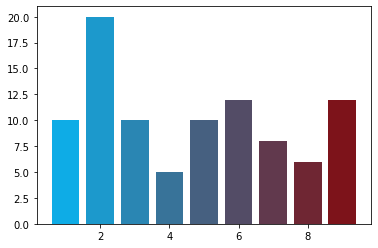

In [65]:
data_ = [10, 20, 10, 5, 10, 12, 8, 6, 12]
plt.bar(x = [1,2,3,4,5,6,7,8,9], 
        height = data_, 
        color = [namecolor_to_rgb('darkred!10!deepskyblue'),
                 namecolor_to_rgb('darkred!20!deepskyblue'),
                 namecolor_to_rgb('darkred!30!deepskyblue'),
                 namecolor_to_rgb('darkred!40!deepskyblue'),
                 namecolor_to_rgb('darkred!50!deepskyblue'),
                 namecolor_to_rgb('darkred!60!deepskyblue'),
                 namecolor_to_rgb('darkred!70!deepskyblue'),
                 namecolor_to_rgb('darkred!80!deepskyblue'),
                 namecolor_to_rgb('darkred!90!deepskyblue'),])
plt.show()                 

Gradient between two colors using list comprehensions.

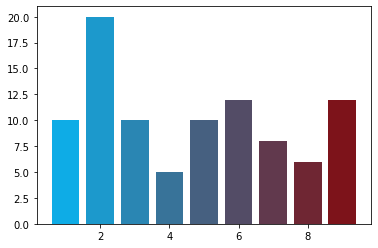

In [66]:
colores = ['darkred!' + str(x) + '!deepskyblue' for x in [10,20,30,40,50,60,70,80,90]]
data_ = [10, 20, 10, 5, 10, 12, 8, 6, 12]
plt.bar(x = [1,2,3,4,5,6,7,8,9], 
        height = data_, 
        color = list(map(namecolor_to_rgb, colores)))
plt.show()        

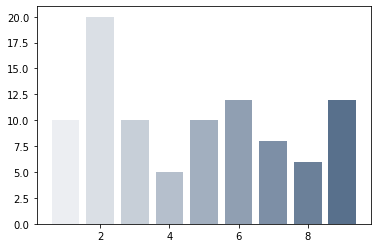

In [67]:
colores = ['darkred!50!deepskyblue!' + str(x) for x in [10,20,30,40,50,60,70,80,90]]
data_ = [10, 20, 10, 5, 10, 12, 8, 6, 12]
plt.bar(x = [1,2,3,4,5,6,7,8,9], 
        height = data_, 
        color = list(map(namecolor_to_rgb, colores)))
plt.show()        

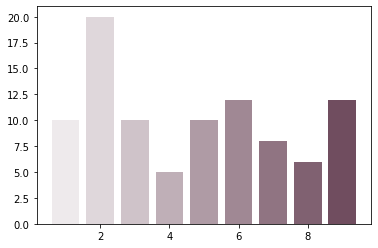

In [68]:
colores = ['darkred!70!deepskyblue!' + str(x) for x in [10,20,30,40,50,60,70,80,90]]
data_ = [10, 20, 10, 5, 10, 12, 8, 6, 12]
plt.bar(x = [1,2,3,4,5,6,7,8,9], 
        height = data_, 
        color = list(map(namecolor_to_rgb, colores)))
plt.show()        

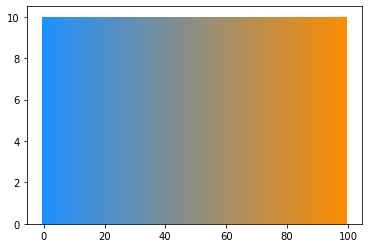

In [69]:
data_ = np.repeat(10,100)
colores = ['darkorange!' + str(x) + '!dodgerblue' for x in range(100)]

plt.bar(x = range(100), height = data_, width = 1.0,
        color = list(map(namecolor_to_rgb, colores)))
plt.show()        

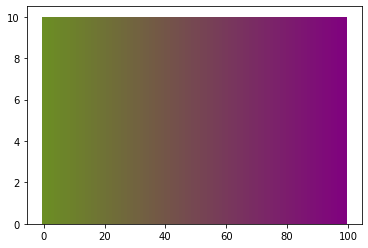

In [70]:
data_ = np.repeat(10,100)
colores = ['purple!' + str(x) + '!olivedrab' for x in range(100)]

plt.bar(x = range(100), height = data_, width = 1.0,
        color = list(map(namecolor_to_rgb, colores)))
plt.show()        

### Using the color name

In [71]:
import matplotlib.colors as mcolors

In [75]:
list_of_colors = list(mcolors.CSS4_COLORS.keys())

colors_to_plot_ = []

for i_ in range(20):
    color1_ = np.random.choice(list_of_colors, size = 1)[0]
    color2_ = np.random.choice(list_of_colors, size = 1)[0]
    mix_ = np.random.randint(low = 0, high = 99, size = 1)[0]
    
    colors_to_plot_.append(color1_ + '!' + str(mix_) + '!' + color2_)    


In [76]:
colors_to_plot_

['lightgray!58!royalblue',
 'ivory!54!peachpuff',
 'seagreen!47!papayawhip',
 'darkviolet!47!dodgerblue',
 'gold!42!royalblue',
 'gainsboro!18!khaki',
 'orange!86!moccasin',
 'skyblue!30!darkgreen',
 'powderblue!93!linen',
 'darkmagenta!92!magenta',
 'salmon!81!blueviolet',
 'lightgoldenrodyellow!33!magenta',
 'turquoise!91!salmon',
 'brown!87!magenta',
 'darkslategray!0!purple',
 'firebrick!25!darksalmon',
 'lemonchiffon!80!brown',
 'coral!4!olivedrab',
 'blueviolet!15!palevioletred',
 'palegreen!21!darkgray']

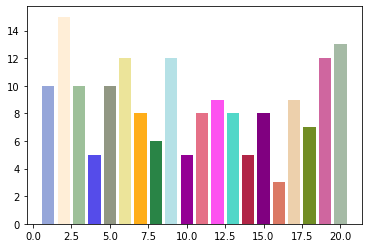

In [77]:
data_ = [10, 15, 10, 5, 10, 12, 8, 6, 12, 5, 8, 9, 8, 5, 8, 3, 9, 7, 12, 13]
plt.bar(x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
        height = data_, 
        color = list(map(namecolor_to_rgb, colors_to_plot_)))
plt.show()        